## Import the Libraries

In [37]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as sns
plt.style.use('fivethirtyeight')

## Data Preprocessing and reading

In [38]:
data=pd.read_csv('../dataset/Seethaeliya1.csv')
##importing the data

In [39]:
data.head()
##watching head values of dataset

,Date,T_Max,T_Min,RH_1,RH_2,Wind_speed,sunshine_hours,rainfall,evaporation
0,1/1/2016,16.8,12.4,100.0,98.0,13.75,0.0,8.5,1.16
1,1/2/2016,16.2,11.4,98.0,98.0,6.66,3.0,2.3,0.97
2,1/3/2016,18.8,12.0,92.0,98.0,5.92,5.8,0.0,1.58
3,1/4/2016,19.8,12.6,94.0,94.0,4.63,7.1,0.0,1.84
4,1/5/2016,20.2,14.8,96.0,74.0,5.52,10.4,0.2,1.47


In [40]:
data.shape
##the shape of the dataset

(2192, 9)

In [41]:
##showing the datatypes
data.dtypes

Date               object
T_Max              object
T_Min             float64
RH_1              float64
RH_2              float64
Wind_speed        float64
sunshine_hours    float64
rainfall          float64
evaporation       float64
dtype: object

In [42]:
##converting date and time
data['Date']=pd.to_datetime(data['Date'])

In [43]:
data.dtypes

Date              datetime64[ns]
T_Max                     object
T_Min                    float64
RH_1                     float64
RH_2                     float64
Wind_speed               float64
sunshine_hours           float64
rainfall                 float64
evaporation              float64
dtype: object

In [44]:
##We will need to remove the T_max feature because there are so much null values
##remove the T_Max column
data=data.drop(['T_Max'],axis=1)

In [45]:
data.set_index('Date',inplace=True) ##indexing

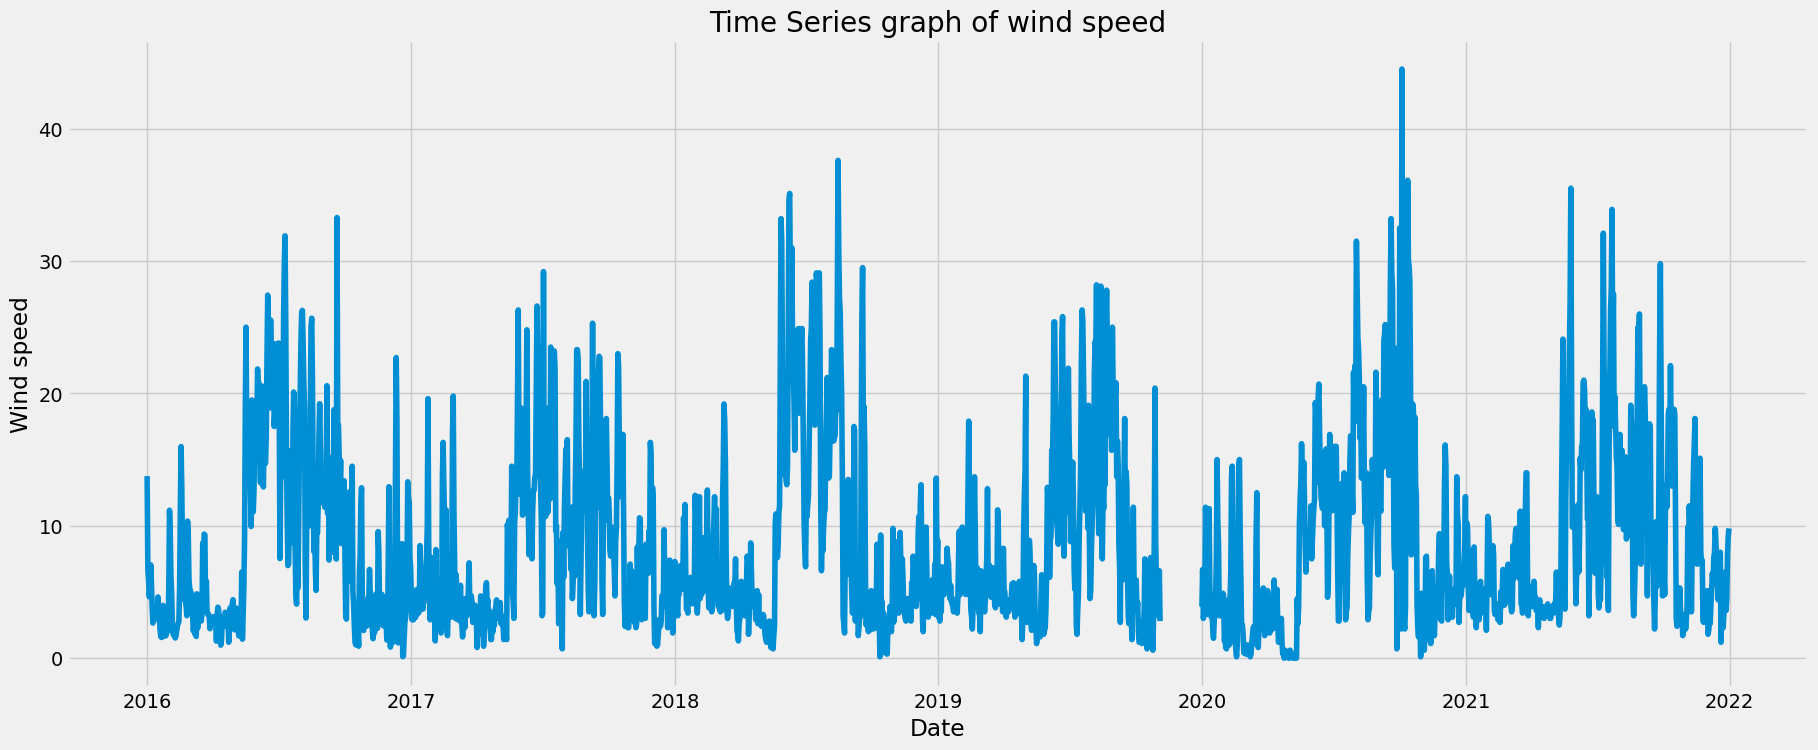

In [53]:
##time series plot of minimum rh1
plt.figure(figsize=(20,8))
plt.plot(data['Wind_speed'])
plt.title('Time Series graph of wind speed')
plt.xlabel('Date')
plt.ylabel('Wind speed')
plt.show()

In [47]:
data.head()

,T_Min,RH_1,RH_2,Wind_speed,sunshine_hours,rainfall,evaporation
Date,,,,,,,
2016-01-01,12.4,100.0,98.0,13.75,0.0,8.5,1.16
2016-01-02,11.4,98.0,98.0,6.66,3.0,2.3,0.97
2016-01-03,12.0,92.0,98.0,5.92,5.8,0.0,1.58
2016-01-04,12.6,94.0,94.0,4.63,7.1,0.0,1.84
2016-01-05,14.8,96.0,74.0,5.52,10.4,0.2,1.47


In [48]:
##create a new dataframe with only the Windspeed column
data4=data.filter(['Wind_speed'])
data4=data4.interpolate() ##handle null values with linear interpolation
##convert the dataframe into a numpy array
dataset4=data4.values
##get the number of rows to train the model
train_data_len=math.ceil(len(dataset4)*.8)

train_data_len

1754

In [49]:
data4

,Wind_speed
Date,
2016-01-01,13.75
2016-01-02,6.66
2016-01-03,5.92
2016-01-04,4.63
2016-01-05,5.52
...,...
2021-12-27,3.60
2021-12-28,4.50
2021-12-29,7.80


In [50]:
data4.apply(pd.isnull).sum() ##check null values after interpolation

Wind_speed    0
dtype: int64

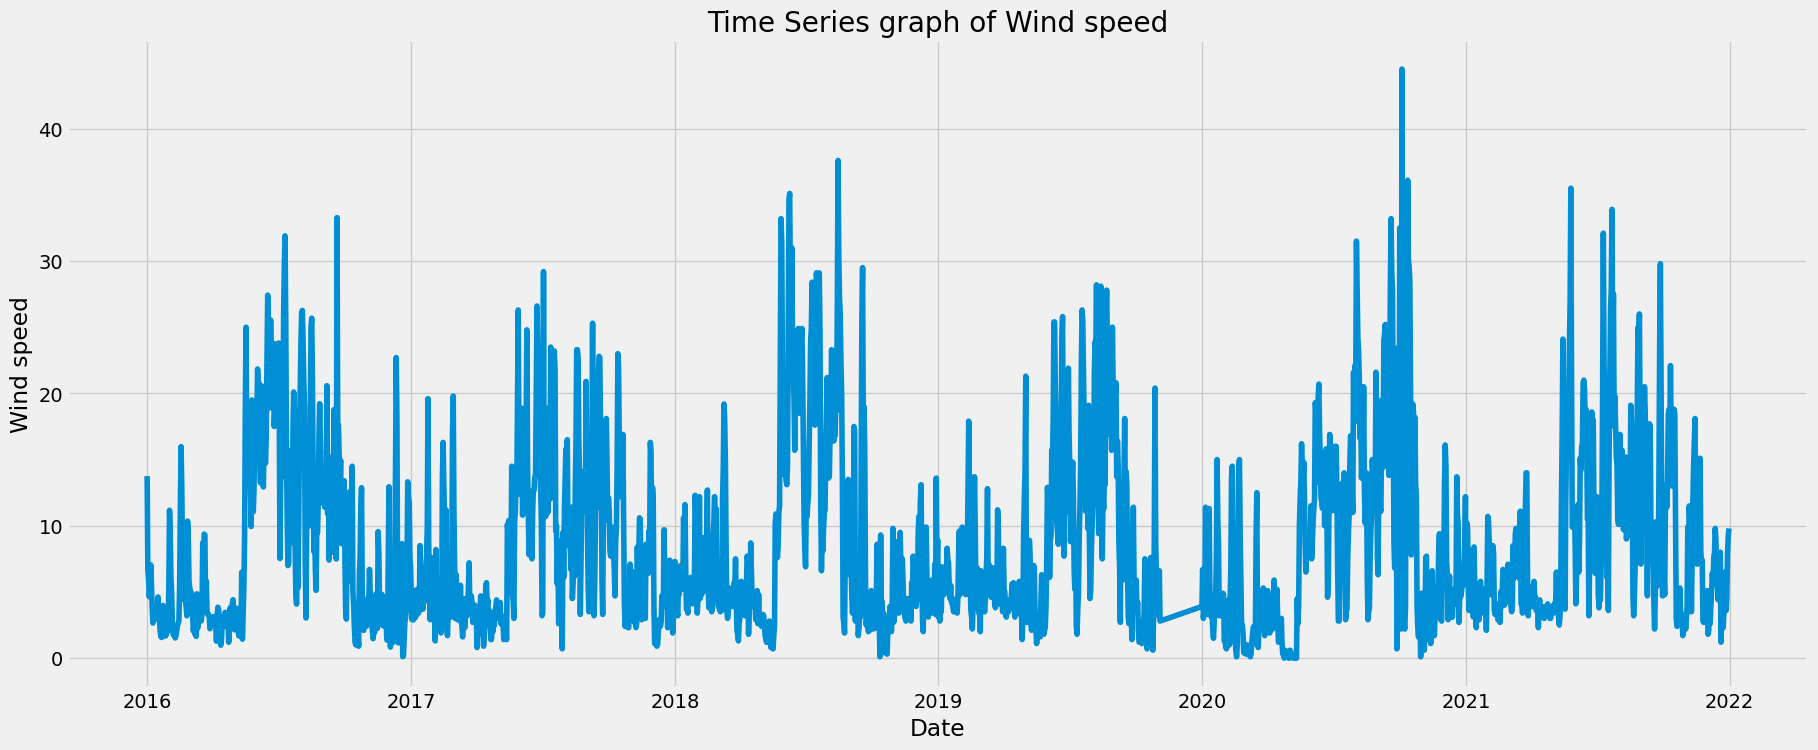

In [52]:
##time series plot of windspeed
plt.figure(figsize=(20,8))
plt.plot(data4['Wind_speed'])
plt.title('Time Series graph of Wind speed')
plt.xlabel('Date')
plt.ylabel('Wind speed')
plt.show()

In [54]:
##Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
sc=scaler.fit_transform(dataset4)
sc

array([[0.30898876],
       [0.14966292],
       [0.13303371],
       ...,
       [0.1752809 ],
       [0.20674157],
       [0.22022472]])

In [55]:
#Create the training data set
##create the scaled training data set
train_data=sc[0:train_data_len,:]
##split the data into x_train and y_train data sets

x_train=[] ##features
y_train=[] ##target

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.30898876, 0.14966292, 0.13303371, 0.10404494, 0.12404494,
       0.15820225, 0.12494382, 0.0858427 , 0.05955056, 0.07280899,
       0.07303371, 0.07370787, 0.07033708, 0.06651685, 0.06674157,
       0.10382022, 0.07438202, 0.06898876, 0.04606742, 0.03662921,
       0.03505618, 0.05550562, 0.0894382 , 0.03730337, 0.06539326,
       0.05617978, 0.03797753, 0.0588764 , 0.05865169, 0.0458427 ,
       0.11955056, 0.25101124, 0.21393258, 0.13730337, 0.10786517,
       0.05865169, 0.04022472, 0.04134831, 0.03685393, 0.0341573 ,
       0.03820225, 0.04651685, 0.05550562, 0.05865169, 0.06292135,
       0.12044944, 0.25370787, 0.35910112, 0.29123596, 0.16696629,
       0.11280899, 0.10404494, 0.09820225, 0.0988764 , 0.08786517,
       0.07191011, 0.23258427, 0.20561798, 0.13101124, 0.11932584])]
[0.11033707865168539]



In [56]:
##convert train sets to numpyarrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train
y_train
##here we have 2d array
##but dealing with LSTM we need to have 3d array
##therefore it is needed to reshape the data

array([0.11033708, 0.11191011, 0.09213483, ..., 0.1752809 , 0.25393258,
       0.43146067])

In [57]:
##reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1694, 60, 1)

## Model Building

In [58]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,activation='relu',return_sequences=False))
model.add(Dense(25,activation='relu'))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

##train the model
history = model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
1694/1694 [==============================] - 35s 20ms/step - loss: 0.0161
Epoch 2/10
1694/1694 [==============================] - 33s 20ms/step - loss: 0.0114
Epoch 3/10
1694/1694 [==============================] - 33s 19ms/step - loss: 0.0094
Epoch 4/10
1694/1694 [==============================] - 31s 18ms/step - loss: 0.0089
Epoch 5/10
1694/1694 [==============================] - 31s 18ms/step - loss: 0.0088
Epoch 6/10
1694/1694 [==============================] - 31s 19ms/step - loss: 0.0086
Epoch 7/10
1694/1694 [==============================] - 32s 19ms/step - loss: 0.0086
Epoch 8/10
1694/1694 [==============================] - 32s 19ms/step - loss: 0.0086
Epoch 9/10
1694/1694 [==============================] - 33s 19ms/step - loss: 0.0085
Epoch 10/10
1694/1694 [==============================] - 32s 19ms/step - loss: 0.0086


Text(0.5, 1.0, 'Model Accuracy')

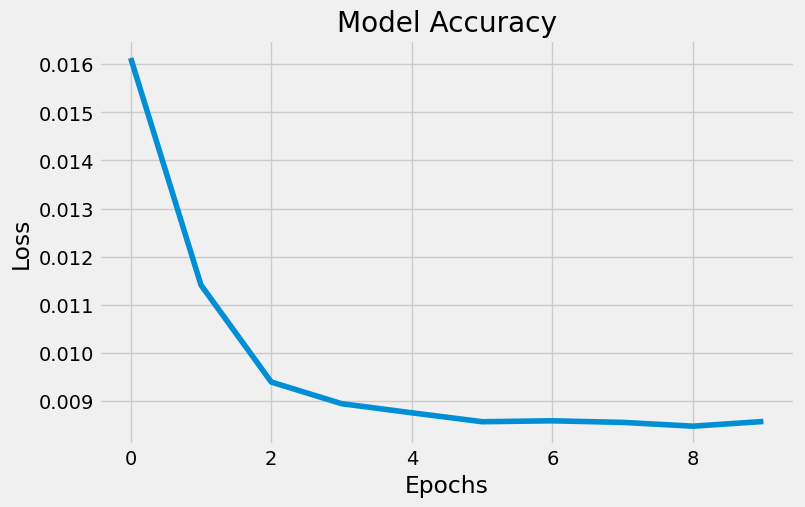

In [59]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [60]:
##create the testing dataset
##create a new array containing scaled values from index 1694 to 2192
test_data=sc[train_data_len-60:,:]
##Create data set x_test and y_test
x_test=[]
y_test=dataset4[train_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [61]:
##convert the data into numpy array
x_test=np.array(x_test)

In [62]:
##reshape the dataset
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [63]:
##get the models predicted temperatures
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions) ##unscaling

14/14 [==============================] - 0s 13ms/step


In [64]:
##calculate RMSE
##lower the RMSE higher the accuracy
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

3.617118091612516

C:\Users\Chalaka\AppData\Local\Temp\ipykernel_9540\509227621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['Predictions']=predictions


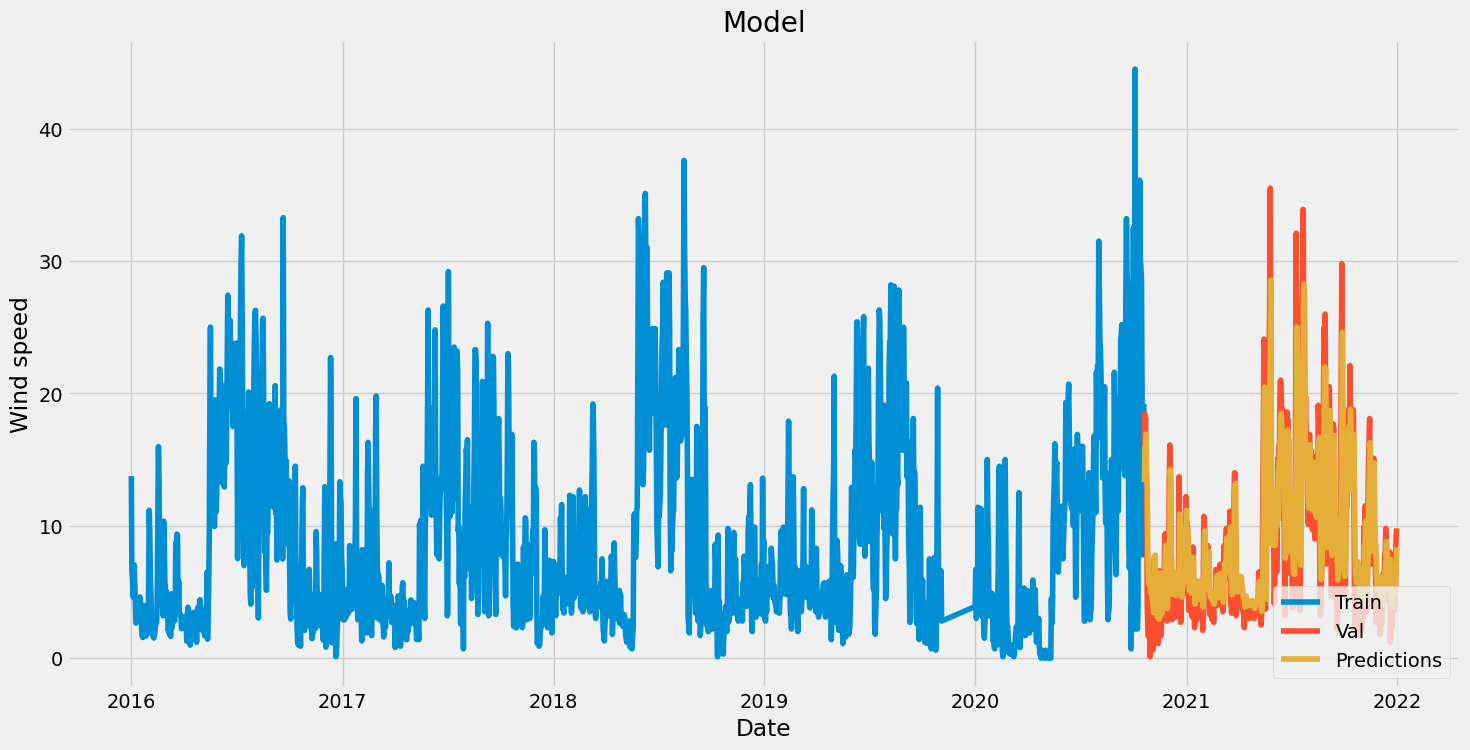

In [65]:
##plot the data
train=data4[:train_data_len]
validation_data=data4[train_data_len:]
validation_data['Predictions']=predictions

##visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Wind speed')
plt.plot(train['Wind_speed'])
plt.plot(validation_data[['Wind_speed','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

## Prediction for windspeed for the next day

In [66]:
##get the quote
data4_quote=pd.read_csv('../dataset/Seethaeliya1.csv')

In [67]:
data4_quote.set_index('Date',inplace=True)

In [68]:
##create a new dataframe
new_data4=data4_quote.filter(['Wind_speed'])
##get the last 60 day winspeed and convert the dataframe to an array
last_60=new_data4[-60:].values
##scale the data between 0 and 1
sc_last_60=scaler.transform(last_60)
##Create an empty list
X_test=[]
##Append the past days
X_test.append(sc_last_60)
##convert the X_test data to numpy array
X_test=np.array(X_test)
##reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
##Get the predicted scaled windspeed
pred_ws=model.predict(X_test)
##undo the scaling
pred_ws=scaler.inverse_transform(pred_ws)
print(pred_ws) ##windspeed for 2022-01-01

1/1 [==============================] - 0s 31ms/step
[[9.116606]]


In [ ]:
##actual value==